In [2]:
from textblob import TextBlob

In [4]:
feedback1 = "the food at Yochina is so good"
feedback2 = "the food at Yochina is awesome"
feedback3 = "the food at Yochina is bad"
feedback4 = "the food at Yochina is horrible"

In [5]:
blob1 = TextBlob(feedback1)
blob2 = TextBlob(feedback2)
blob3 = TextBlob(feedback3)
blob4 = TextBlob(feedback4)

In [6]:
print(blob1.sentiment) #1 is positive, 0 is neutral, -1 is negative

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)


In [7]:
print(blob2.sentiment)

Sentiment(polarity=1.0, subjectivity=1.0)


In [8]:
print(blob3.sentiment)

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)


In [9]:
print(blob4.sentiment)

Sentiment(polarity=-1.0, subjectivity=1.0)


In [10]:
import tweepy
from textblob import TextBlob

In [21]:
consumer_key = 'W9RlkkdVS65bVXKbxOOYPOzS9'
consumer_secret = 'SasumveKiL8u7NioSj45eAQgPwVzCTRPPwo9agHQcBk4HzVJHX'
access_token = '852425121604050944-4msSmKZhAE6erbNuxCF8ef7GZjYGk3O'
access_token_secret = 'WmsuZRfpQjRFZEbvNTa1agKFAwK3N0ei1RAKJg4FpjRaS'
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)
public_tweets = api.search('homo')
for tweet in public_tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    print(analysis.sentiment)

@homo_2ji „Ç¥„É™„É©Ë™¨ÊµÆ‰∏ä‚Ä¶ü¶ç
Ââ≤„Å®ÈÄÉ„Åí„ÇÑ„Åô„ÅÑ„Åì„Å®„ÇíÁô∫Ë¶ã„Åó„Åæ„Åó„Åüü§ì
Sentiment(polarity=0.0, subjectivity=0.0)
https://t.co/8b6A6HkXuu
Sentiment(polarity=0.0, subjectivity=0.0)
Tom sounds homo
Sentiment(polarity=0.0, subjectivity=0.0)
ÊúÄÂæåÔºà„ÅÆÈõ∑ÂàáÔºâ„ÅåÊ∞óÊåÅ„Å°„Çà„Åã„Å£„ÅüÔºàÈôêÂÆö„Ç≠„É£„É©‰∏¶„ÅÆÊÑüÊÉ≥Ôºâ
Sentiment(polarity=0.0, subjectivity=0.0)
RT @urdamncunt: homophobie:
‚Äì un d√©put√© br√©silien ouvertement homosexuel d√©missionne et quitte le pays apr√®s des menaces de mort
‚Äì le massa‚Ä¶
Sentiment(polarity=0.0, subjectivity=0.0)
You keep forgetting the no homo, homie https://t.co/gX6z25H43x
Sentiment(polarity=0.0, subjectivity=0.0)
„Ç¢„Ç¶„Çπ„Éà„É©„É≠„Éî„ÉÜ„ÇØ„Çπ„ÅØË©±„Åó„Åã„Åë„Å™„ÅÑ„Åß‰∏ã„Åï„ÅÑ„ÄÇ
‰ΩéËÑ≥„ÅåÁßª„Çã„ÄÇ
Sentiment(polarity=0.0, subjectivity=0.0)
At this point I feel like queer is the "white kids rapping" era of hip hop (credit to a friend o mine). Call yourse‚Ä¶ https://t.co/vbEjEyE1C5
Sentiment(polarity=0.0, subjectivity=0.0)
RT @ndreamon

In [ ]:
/Users/anoushkajain/Downloads/train_E6oV3lV.csv
/Users/anoushkajain/Downloads/test_tweets_anuFYb8.csv

In [1]:
import re #?
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings #?
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
train  = pd.read_csv('/Users/anoushkajain/Downloads/train_E6oV3lV.csv')
test = pd.read_csv('/Users/anoushkajain/Downloads/test_tweets_anuFYb8.csv')

In [3]:
train.head()

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

In [4]:
test.head()

id                                              tweet
0  31963  #studiolife #aislife #requires #passion #dedic...
1  31964   @user #white #supremacists want everyone to s...
2  31965  safe ways to heal your #acne!!    #altwaystohe...
3  31966  is the hp and the cursed child book up for res...
4  31967    3rd #bihday to my amazing, hilarious #nephew...

In [7]:
combi = train.append(test, ignore_index = True) #why ignore_index = True

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [8]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    


In [10]:
# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

In [11]:
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")


In [12]:
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [13]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [14]:
combi.head()

id  label                                              tweet  \
0   1    0.0   @user when a father is dysfunctional and is s...   
1   2    0.0  @user @user thanks for #lyft credit i can't us...   
2   3    0.0                                bihday your majesty   
3   4    0.0  #model   i love u take with u all the time in ...   
4   5    0.0             factsguide: society now    #motivation   

                                          tidy_tweet  
0  when father dysfunctional selfish drags kids i...  
1  thanks #lyft credit cause they offer wheelchai...  
2                                bihday your majesty  
3                         #model love take with time  
4                     factsguide society #motivation

In [15]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [16]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [17]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet


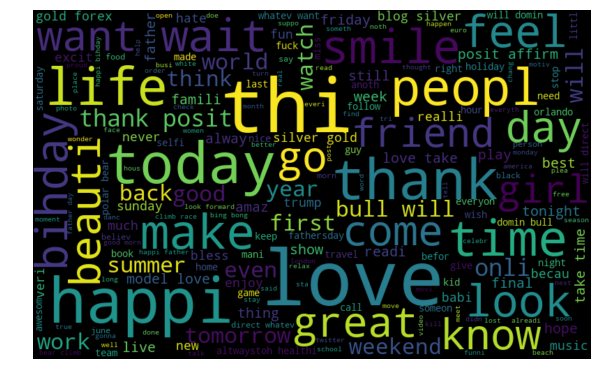

In [19]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

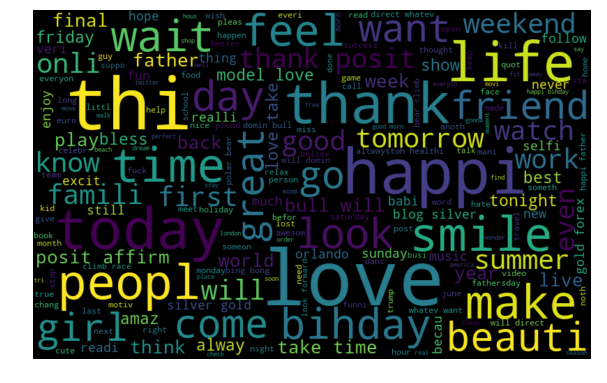

In [20]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

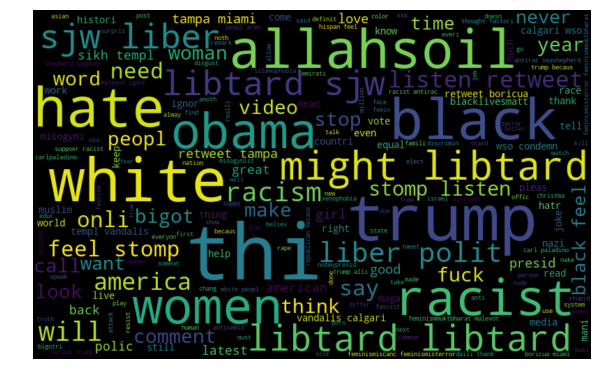

In [21]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [22]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [23]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

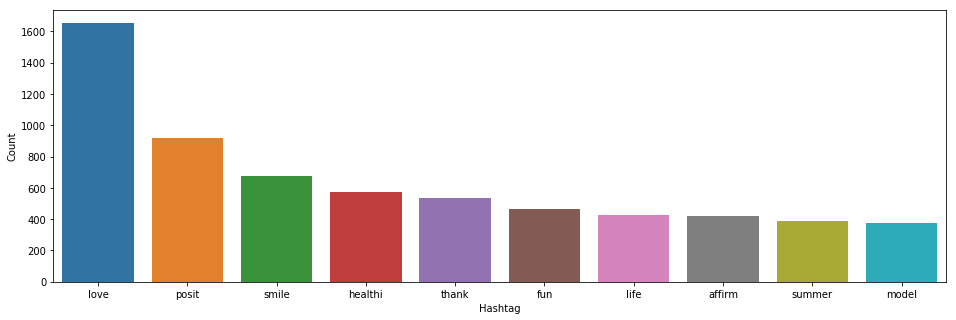

In [24]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

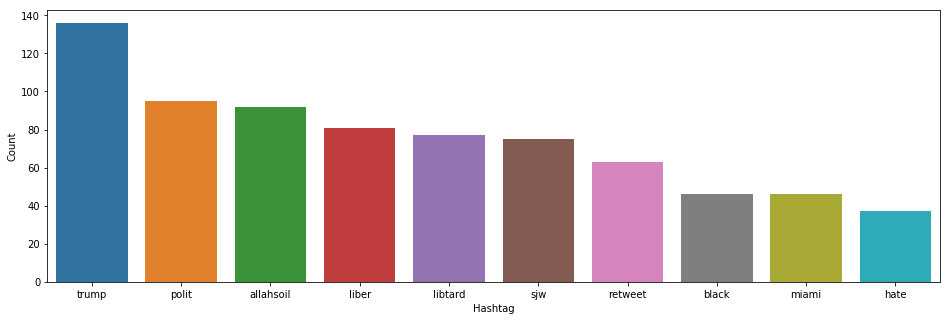

In [25]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5307820299500832

In [29]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

In [30]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5446507515473032